# Klasse B versterkers

<a href="./slides/Klasse-B.slides.html">![sildes](https://img.shields.io/badge/slides-beschikbaar-blue)</a> 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import numpy as np
from PySpice.Probe.Plot import plot
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import schemdraw as schem
import schemdraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=True;
    
def spicelisting(filename):
    with open(filename) as f:
        for line in f:
            print(line.strip())
    print()

## Basisschema

### Schema voor DC werking

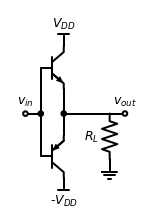

In [40]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75,label='$V_{DD}$')
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN, label='$v_{in}$')
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
outdot=d.add(e.DOT)
d.add(e.LINE, d='down',xy=outdot.start,toy=T2.emitter)
d.add(e.VSS,xy=T2.collector,label='-$V_{DD}$')

d.add(e.LINE,xy=outdot.start,  d='right', l=1.5)
R = d.add(e.RES, d='down', label='$R_L$', l=1.5)
d.add(e.GND)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, label='$v_{out}$')
d.draw()

```{figure} ./images/mpl.svg
---
name: Bfig1
---
Basisschema van de klasse B versterker voor DC werking.
```

Het is belangrijk in dit schema de verschillende bouwblokken te herkennen. {numref}`Bfig1anot` toont deze bouwblokken. We hebben natuurlijk in de eerste plaats de belasting $R_L$. Daarnaast zien we (in de groene box) zowel het pull-up netwerk als het pull-down netwerk aangeduid.

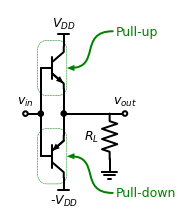

In [71]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75,label='$V_{DD}$')
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN, label='$v_{in}$')
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
outdot=d.add(e.DOT)
d.add(e.LINE, d='down',xy=outdot.start,toy=T2.emitter)
d.add(e.VSS,xy=T2.collector,label='-$V_{DD}$')

d.add(e.LINE,xy=outdot.start,  d='right', l=1.5)
R = d.add(e.RES, d='down', label='$R_L$', l=1.5)
d.add(e.GND)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, label='$v_{out}$')


pullup=d.add(e.EncircleBox([T1],padx=.1).linestyle('--').linewidth(0.5).color('green'))
pulldown=d.add(e.EncircleBox([T2],padx=.1).linestyle('--').linewidth(0.5).color('green'))

d.add(e.Annotate(th1=0).at(pullup.E).delta(dx=1.5, dy=1.2).label('Pull-up').color('green'))
d.add(e.Annotate(th1=0).at(pulldown.E).delta(dx=1.5, dy=-1.2).label('Pull-down').color('green'))
d.draw()

```{figure} ./images/mpl.svg
---
name: Bfig1anot
---
Basisschema van de klasse B versterker voor DC werking met aangeduide bouwblokken
```

### Schema voor AC werking

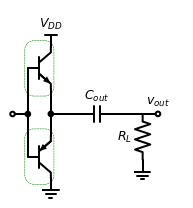

In [137]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75,label='$V_{DD}$')
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
outdot=d.add(e.DOT)
C1 = d.add(e.CAP, d='right', label='$C_{out}$')
R = d.add(e.RES, d='down', label='$R_L$', l=1.5)
d.add(e.GND)
d.add(e.LINE, d='down',xy=outdot.start,toy=T2.emitter)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
d.add(e.DOT_OPEN,label='$v_{out}$')
d.add(e.GND,xy=T2.collector)
d.add(e.EncircleBox([T1],padx=.1).linestyle('--').linewidth(0.5).color('green'))
d.add(e.EncircleBox([T2],padx=.1).linestyle('--').linewidth(0.5).color('green'))
d.draw()

```{figure} ./images/mpl.svg
---
name: Bfig1AC
---
Basisschema van de klasse B versterker voor AC werking
```

In [2]:
spicelisting("simul/classB1.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC	+15V
VNEG 9 0 DC	-15V
*
*  input source
VS1 1 0	DC 0 SIN(0V 5VPEAK 10KHZ)
*
*  PUSH-PULL TRANSISTOR OUTPUT STAGE
Q1 8 1 2 QNPN
Q2 9 1 2 QPNP
*
* Load resistance
RL1 2 0	100
*
* DEVICE MODELS
.model QNPN	NPN(BF=50)
.model QPNP	PNP(BF=50)



De simulatie van de bovenstaande spice code (zie {numref}`Bfig2`) geeft duidelijk de dode zone aan bij de nuldoorgang van de spanning. In {numref}`Bfig2B` bekijken we deze nuldoorgang in meer detail.

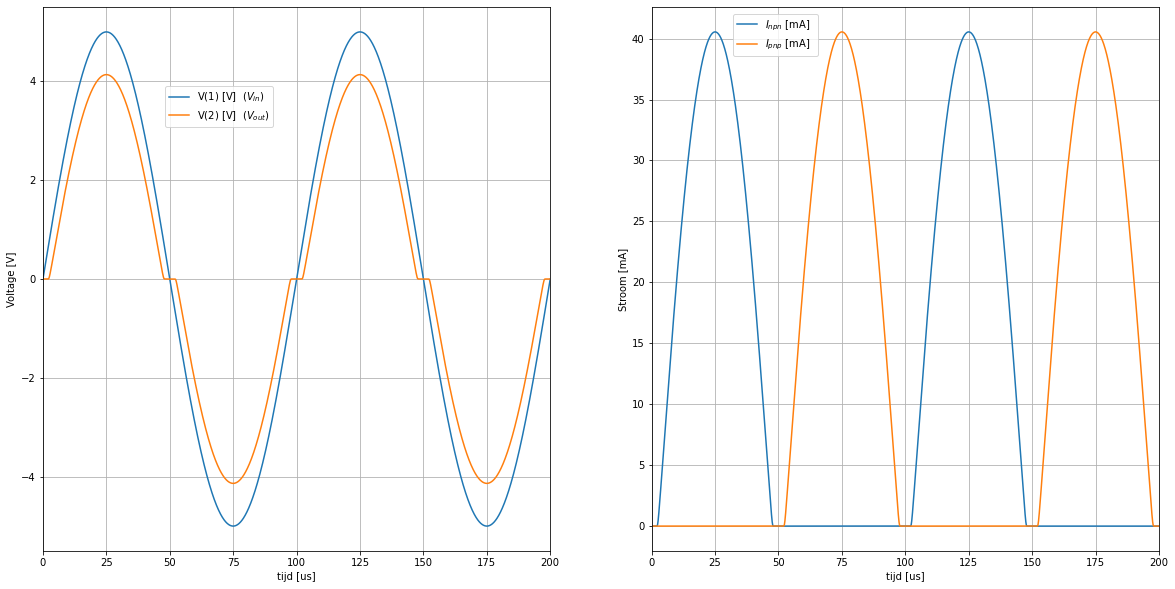

In [61]:
circuit=SpiceParser(path='simul/classB1.sp').build_circuit()     # CHECK DISTORTION WITH FOURIER SERIES ANALYSIS    ==> .FOUR 10KHZ V(12) 
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bfig2
---
De klasse B versterker: stromen en spanningen als functie van de tijd
```

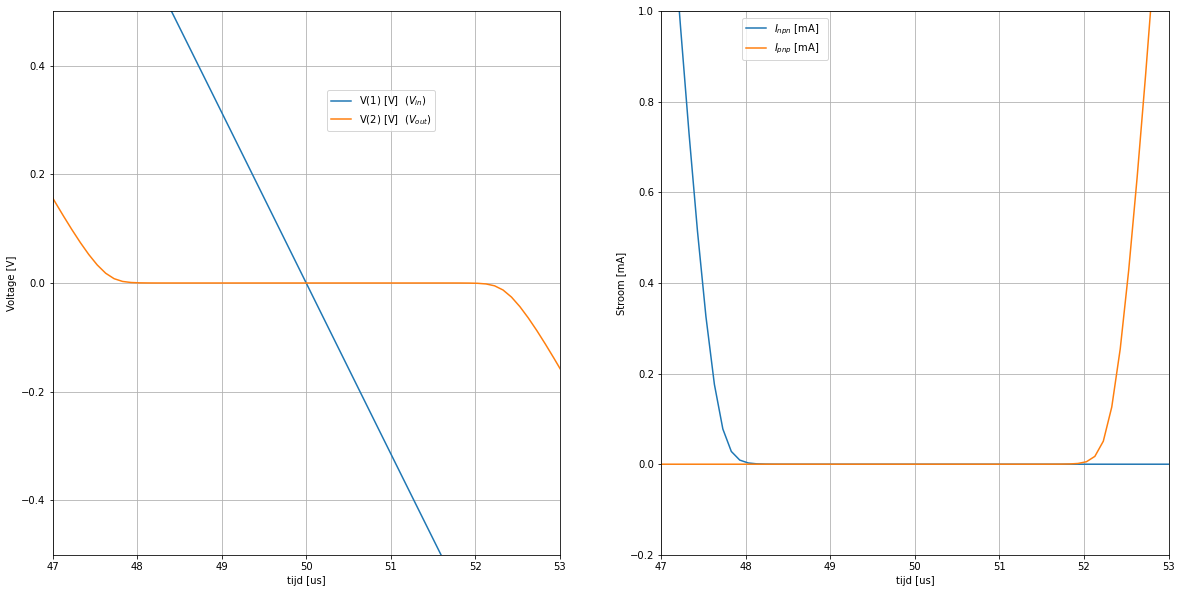

In [68]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.54,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(47,53)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(47,53)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bfig2B
---
De klasse B versterker: detail van de stromen en spanningen als functie van de tijd in de buurt van de nuldoorgang.
```

{numref}`Bfig2C` toont de stroom door als functie van de spanning over de transistor voor de npn transistor. Voor de pnp transistor bekomen we dezelfde grafiek.

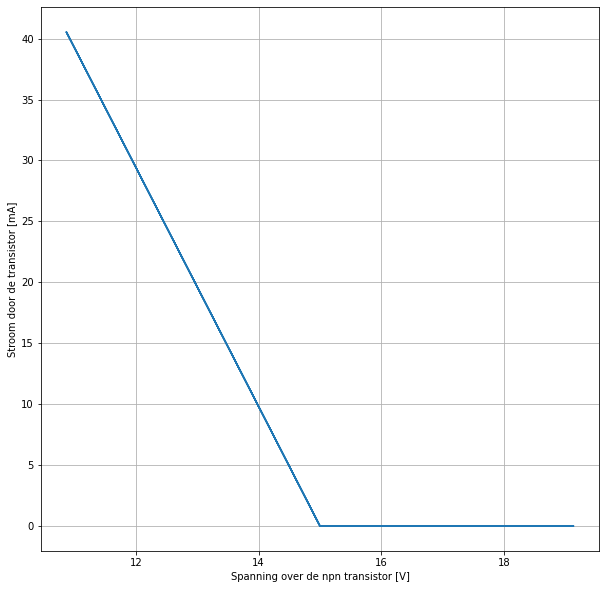

In [20]:
figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['8']-analysis.nodes['2'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bfig2C
---
De klasse B versterker: de stroom door een npn transistor als functie van de spanning
```

## Gebruik van de voorinstelspanning

### diodes als voorinstelspanning

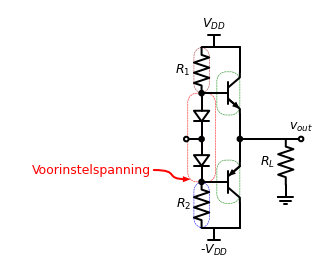

In [33]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base,  d='left', l=0.5)
PullUpIn=d.add(e.DOT)
dv1=d.add(e.DIODE, d='down', l=1.5)
indot=d.add(e.DOT)
dv2=d.add(e.DIODE, d='down', l=1.4)
PullDownIn=d.add(e.DOT)
d.add(e.LINE,  d='right', l=0.5)
T2 = d.add(e.BJT_PNP, d='right')
r1=d.add(e.RES, xy=PullUpIn.start, d='up', label='$R_1$',l=1.5)
d.add(e.LINE,  d='right', l=0.4)
d.add(e.VDD, label='$V_{DD}$')
d.add(e.LINE,  d='right', tox=T1.collector)
d.add(e.LINE,  d='down', toy=T1.collector)
r2=d.add(e.RES, xy=PullDownIn.start, d='down', label='$R_2$',l=1.5)
d.add(e.LINE,  d='right', l=0.4)
d.add(e.VSS,label='-$V_{DD}$')
d.add(e.LINE,  d='right', tox=T2.collector)
d.add(e.LINE,  d='up', toy=T2.collector)

d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
outdot=d.add(e.DOT)
d.add(e.LINE, d='down',toy=T2.emitter)

d.add(e.LINE,xy=outdot.start,  d='right', l=1.5)
R = d.add(e.RES, d='down', label='$R_L$', l=1.5)
d.add(e.GND)
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN, label='$v_{out}$')

d.add(e.EncircleBox([T1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green'))
d.add(e.EncircleBox([T2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('green'))
Voorinstelspanning=d.add(e.EncircleBox([dv1,dv2],padx=0.2,pady=0).linestyle('--').linewidth(0.5).color('red'))
d.add(e.EncircleBox([r1],padx=0,pady=0).linestyle('--').linewidth(0.5).color('brown'))
d.add(e.EncircleBox([r2],padx=0,pady=0).linestyle('--').linewidth(0.5).color('blue'))

d.add(e.Annotate(th1=0).at(Voorinstelspanning.SW).delta(dx=-1.2, dy=0.3).label('Voorinstelspanning').color('red'))

ff=d.draw()
ff.set_bbox([-6.7524653676892985, -5.411111111111111, 3.5739999999999994, 2.711111111111111])
display(ff)

```{figure} ./images/mpl.svg
---
name: Bfig1v2
---
Basisschema van de klasse B versterker voor DC werking met diode voorinstelspanning
```

Hieronder tonen we de spice listing van de klasse B versterker waarbij we een voorinstelspanning voorzien tussen de  basissen van de npn en de pnp transistor. Deze voorinstelspanning is hier uitgevoerd door diodes. in {numref}`Bfig2dio` merken we hierbij op dat dit tot gevolg heeft dat er toch een stroom blijft lopen door de transistor die niet in geleiding is. Dit noemen we de klasse AB werking van deze klasseB versterker.

In [24]:
spicelisting("simul/classB2.sp")

Klasse B versterker
*
* SUPPLY VOLTAGES
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
*
VS2 10 0 DC 0 SIN(0V 5VPEAK 10KHZ)
*
D1  13 10	DNOM
RB1 13 8	10K
Q11 8 13 12 QNPN
*
D2  10 14   DNOM
RB2 14 9    10K
Q12 9 14 12 QPNP
*
RL2 12 0 100
*
* DEVICE MODELS
.model	QNPN	NPN(BF=50)
.model	QPNP	PNP(BF=50)
.model	DNOM	D()



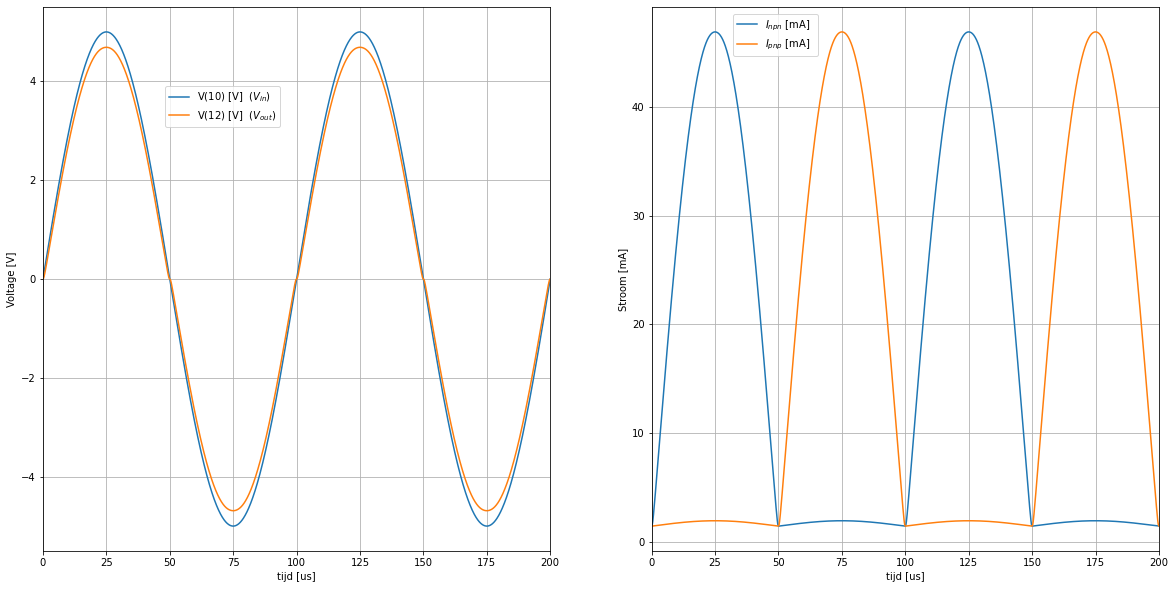

In [2]:
circuit=SpiceParser(path='simul/classB2.sp').build_circuit()  
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['10'],label='V(10) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['12'],label='V(12) [V]  ($V_{out}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bfig2dio
---
De klasse B versterker: stromen en spanningen als functie van de tijd
```

In de grafiek ({numref}`Bfig2dioss`) wordt dit nog duidelijker.

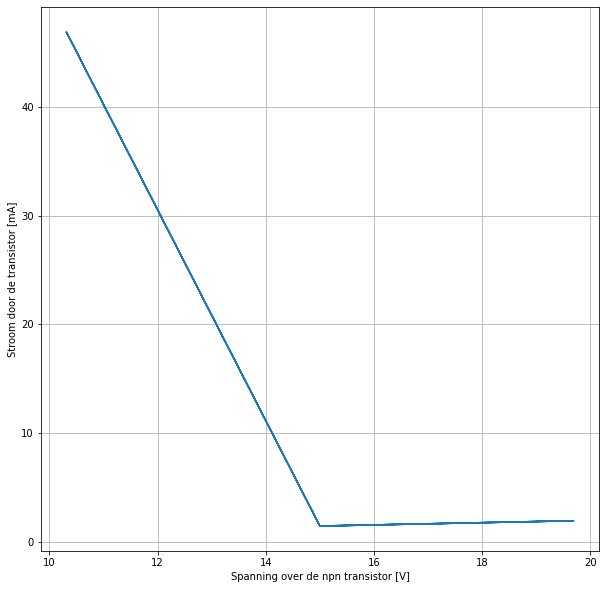

In [36]:
figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['8']-analysis.nodes['12'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bfig2dioss
---
De klasse B versterker: de stroom door een npn transistor als functie van de spanning
```

We kunnen ook proberen de dode zone weg te werken aan de hand van feedback, zoals in het onderstaande schema aan de hand van een opamp. Op het eerste zicht lijkt dat te lukken, als we de simulatie in {numref}`Bopmapsim` bekijken. De $V_{in}$ en $V_{out}$ liggen zo goed als volledig op elkaar dat we het verschil niet merken. Enkel als we heel erg inzoemen, zoals in {numref}`Bopmapsimz` lijkt er een klein verschil te zijn langs de nuldoorgang. Laat je hierbij echter niet vangen. Deze simualtie is gedaan met een ideale OpAmp, warvan de stijsnelheid niet realistisch is. Wanneer we diezelfde simulatie hernemen met een realistische OpAmp, zie onder, blijft dit bijna ideale gedrag niet behouden.

In [3]:
print(SpiceParser(path='simul/classB4.sp').build_circuit())

.title Klasse B versterker  PUSH-PULL PLACED IN OPAMP FEEDBACK LOOP
VPOS 8 0 DC +15V
VNEG 9 0 DC -15V
VS3 20 0 DC 0 SIN(0V 5VPEAK 10KHZ)
Q21 8 23 22 QNPN
Q22 9 23 22 QPNP
RL3 22 0 100
XOpAmp 20 22 8 9 23 opamp
.model QNPN NPN (BF=50)
.model QPNP PNP (BF=50)
.model DNOM D ()



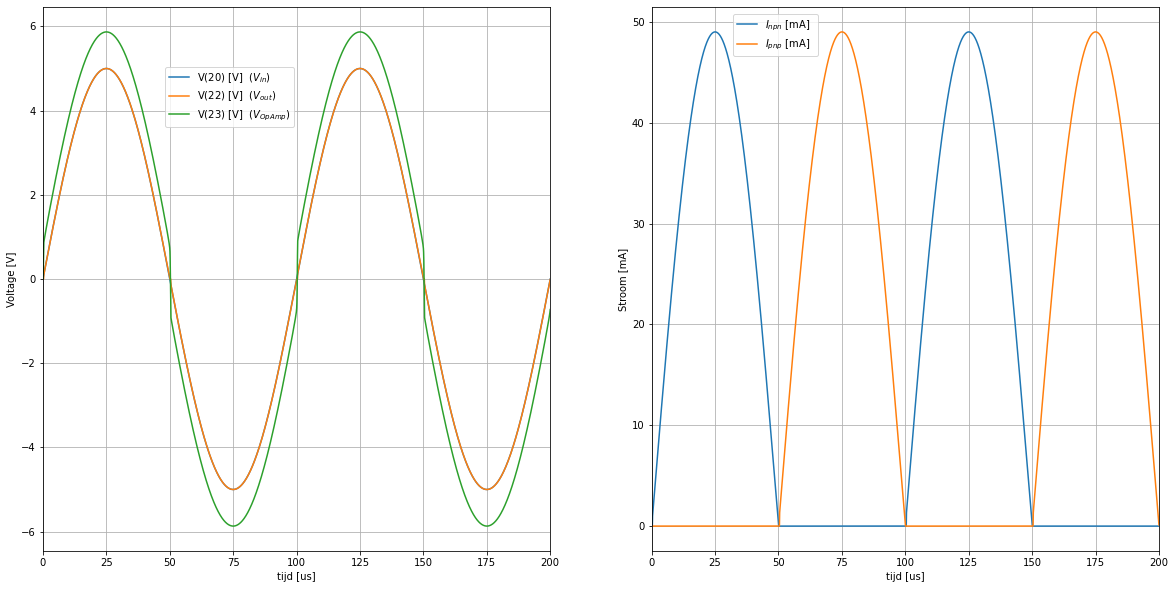

In [4]:
circuit=SpiceParser(path='simul/classB4.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bopmapsim
---
De klasse B versterker teruggekoppeld met een ideale OpAmp: stromen en spanningen als functie van de tijd
```

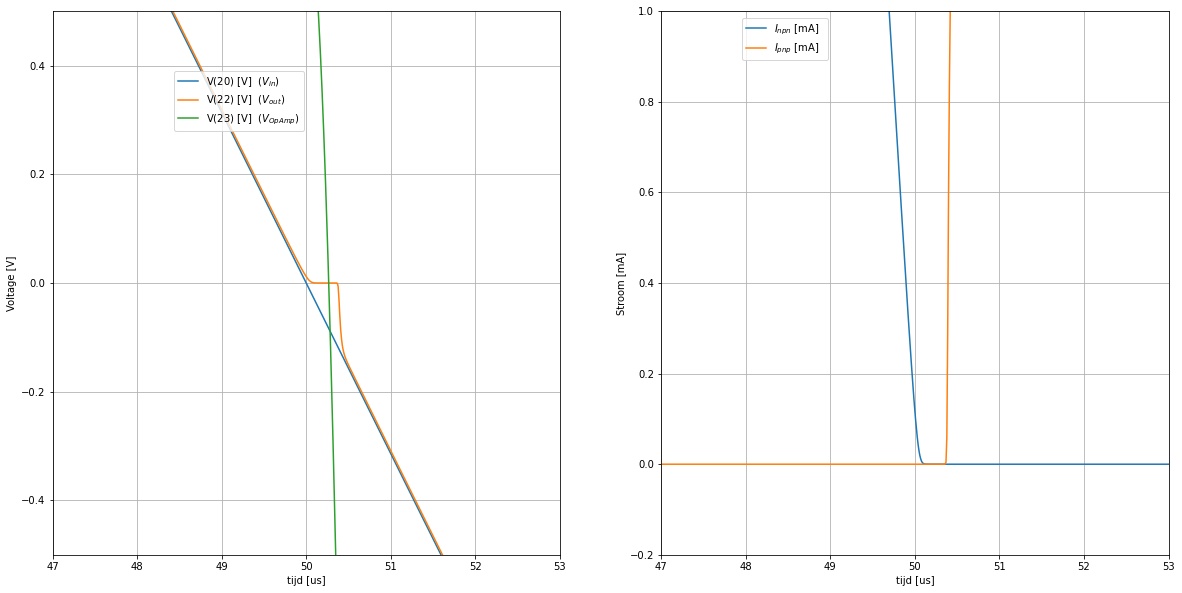

In [3]:
figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(47,53)
ax[0].set_ylim(-0.5,0.5)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(47,53)
ax[1].set_ylim(-0.2,1)
ax[1].set_ylabel('Stroom [mA]')
plt.show()


```{figure} ./images/mpl.svg
---
name: Bopmapsimz
---
De klasse B versterker teruggekoppeld met een ideale OpAmp: stromen en spanningen als functie van de tijd in de nabijheid van de nuldoorgang
```

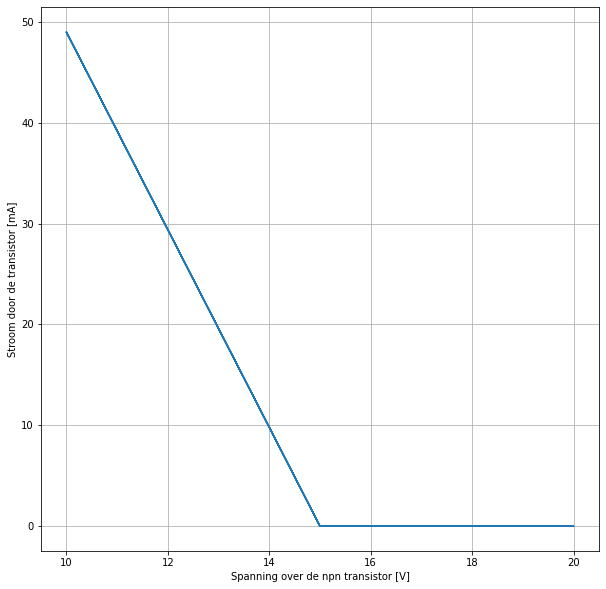

In [59]:
figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['8']-analysis.nodes['22'],-analysis.branches['vpos']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de npn transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bopamp_dio
---
De klasse B versterker: de stroom door een npn transistor als functie van de spanning
```

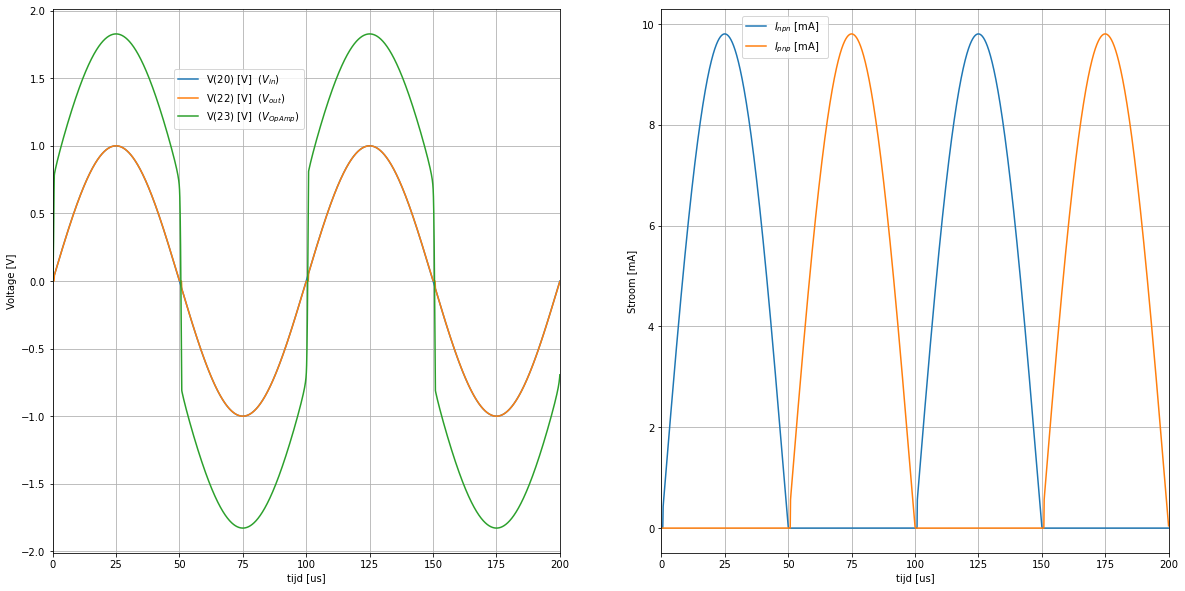

In [8]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/BasicOpamp.cir')
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bopmapsiml
---
De klasse B versterker met lagere voedingsspanning teruggekoppeld met een ideale OpAmp: stromen en spanningen als functie van de tijd
```

Echter, wanneer we een realistisch model van een opamp invoeren, zoals de [LMV981-N](https://www.ti.com/product/LMV981-N) van Texas Instruments, zien we een heel ander gedrag in de dode zone.

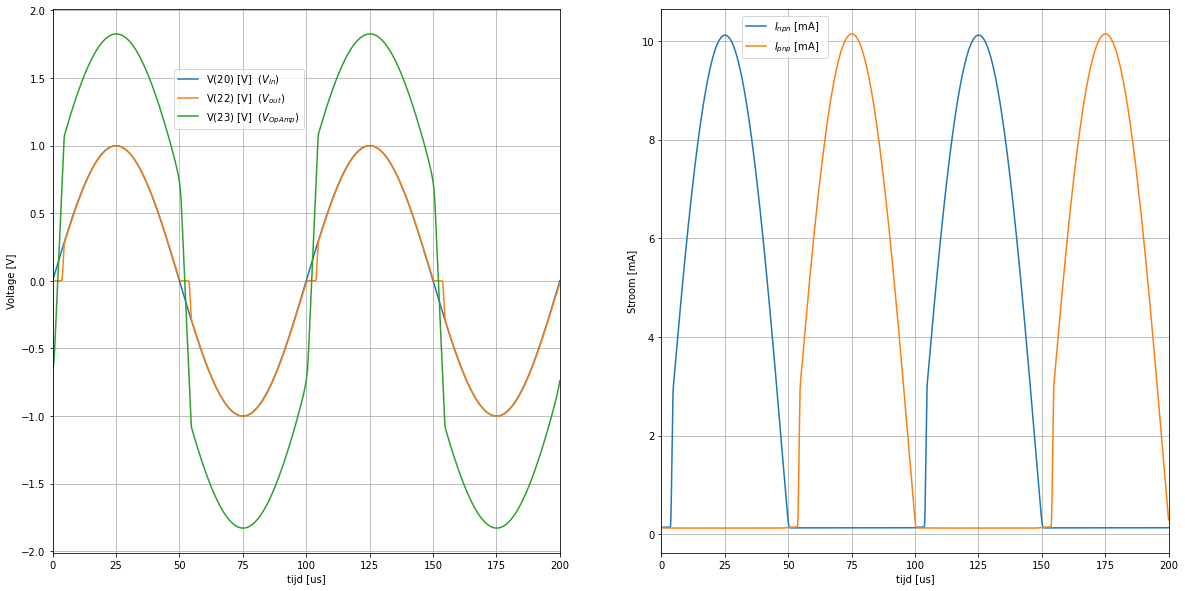

In [7]:
circuit=SpiceParser(path='simul/classB5.sp').build_circuit()  
circuit.include('libraries/opamp/LMV981.cir')   # Dit is een opamp met lage voedingsspanning. Beter een opamp kiezen met aangepast voedingsspaaningsbereik.
end_time=2e-4
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=10e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['20'],label='V(20) [V]  ($V_{in}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['22'],label='V(22) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['23'],label='V(23) [V]  ($V_{OpAmp}$)')
ax[0].legend( loc=(0.24,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,-analysis.branches['vpos']*1e3,label='$I_{npn}$ [mA] ')
ax[1].plot(analysis.time*1e6,analysis.branches['vneg']*1e3,label='$I_{pnp}$ [mA]  ')
ax[1].legend( loc=(0.16,.91))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Bopmapsiml2
---
De klasse B versterker met lagere voedinsspanning teruggekoppeld met een realistisch OpAmp model [LMV981-N](https://www.ti.com/product/LMV981-N): stromen en spanningen als functie van de tijd
```

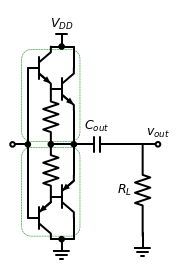

In [148]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=2.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=2.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
T11 = d.add(e.BJT_NPN, d='right',xy=T1.emitter)
r11=d.add(e.RES, d='down',xy=T1.emitter,l=1.8)
outdot=d.add(e.DOT)
d.add(e.LINE, d='down',xy=T11.emitter,toy=outdot.start)
d.add(e.DOT)
d.add(e.LINE, d='up',xy=T11.collector,toy=T1.collector)
d.add(e.LINE, d='left',l=0.4)
d.add(e.DOT)
d.add(e.VDD,label='$V_{DD}$')
d.add(e.LINE, d='left',tox=T1.collector)

r21=d.add(e.RES, d='down',xy=outdot.start,toy=T2.emitter)
T21 = d.add(e.BJT_PNP, d='right')
d.add(e.LINE, d='up',xy=T21.emitter,toy=outdot.start)
d.add(e.LINE, d='down',xy=T21.collector,toy=T2.collector)
d.add(e.LINE, d='left',l=0.4)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE, d='left',tox=T2.collector)

C1 = d.add(e.CAP, d='right',xy=outdot.start, label='$C_{out}$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
d.add(e.DOT_OPEN, label='$v_{out}$')
d.add(e.GND, xy=R.end)

d.add(e.LINE,d='up',toy=T2.collector)

d.add(e.EncircleBox([T1,T11,r11],pady=-0.1).linestyle('--').linewidth(0.5).color('green'))
d.add(e.EncircleBox([T2,T21,r21],pady=-0.1).linestyle('--').linewidth(0.5).color('green'))

d.draw()

```{figure} ./images/mpl.svg
---
name: Bdoubledriver
---
De klasse B versterker met 2 opeenvolgende drive transistors
```

## Uitgewerkt voorbeeld van een klasse AB met MOS transistors

In <cite id="vks4r"><a href="#zotero|11916217/EY2R3695">[1]</a></cite> wordt de klasse AB werking getoond aan de hand van het schema in {numref}`figbias`. We bestuderen dit schema in meer detail. Eerst bekijken we de voorinsteltak. De 2 weerstanden R, samen met de 2 diodes zorgen ervoor dat zonder aangelegd signaal de spanning $V_i$ gelegen is midden de 2 voedingsspanningen. De 2 weerstanden R zijn dan zo gekozen dat de $I_B$ een DC stroomcomponenten heeft die mooi kan ingesteld worden door R.

Wanneer we vervolgens een AC signaal aanleggen, krijgen we de volgende signalen:
* $V_I+V_D$ aan de ingang van de nMOS transistor $M_N$
* $V_I-V_D$ aan de ingang van de pMOS transistor $M_P$

Onder zo goed als alle omstandigheden zullen zowel de nMOS als de pMOS in saturatie zijn. Dit wil zeggen dat de stromen door deze transistors voldoen aan de vergelijkingen:

$$ I_n=\mu_n C_{ox} \frac{W_n}{2L_n} (V_{GSn} -V_{Tn})^2$$  

als $V_{GSn} >V_{Tn}$

$$ I_p=\mu_p C_{ox} \frac{W_p}{2L_p} (V_{GSp} -V_{Tp})^2$$  

als $V_{GSp} <V_{Tp}$


```{figure} ./images/ClassB_Bias.png
---
name: figbias
---
Klasse AB versterker met MOS transistors <cite id="vks4r"><a href="#zotero|11916217/EY2R3695">[1]</a></cite> 
```


Wanneer we de spanning aan de gate en de source invullen krijgen we:

* $ I_n=\mu_n C_{ox} \frac{W_n}{2L_n} (V_I+V_D- V_{out} -V_{Tn})^2$  als $V_I+V_D- V_{out} >V_{Tn}$
* $ I_p=\mu_p C_{ox} \frac{W_p}{2L_p} (V_I-V_D -V_{out}-V_{Tp})^2$   als $V_I-V_D -V_{out} <V_{Tp}$
* $ V_{out}= (I_n -I_p)R_L$

In {numref}`transfer1` berekenen we deze stromen veronderstellen we dat:
$\mu_n C_{ox} \frac{W_n}{2L_n}=\mu_p C_{ox} \frac{W_p}{2L_p}=0.02 A/V^2$,$V_D=0.7V$, $V_{Tn}=0.3V$ $V_{Tp}=-0.3V$ en $R_L=80 \Omega$.

In {numref}`transfer1` zoemen we in op een detail rond de oorsprong.



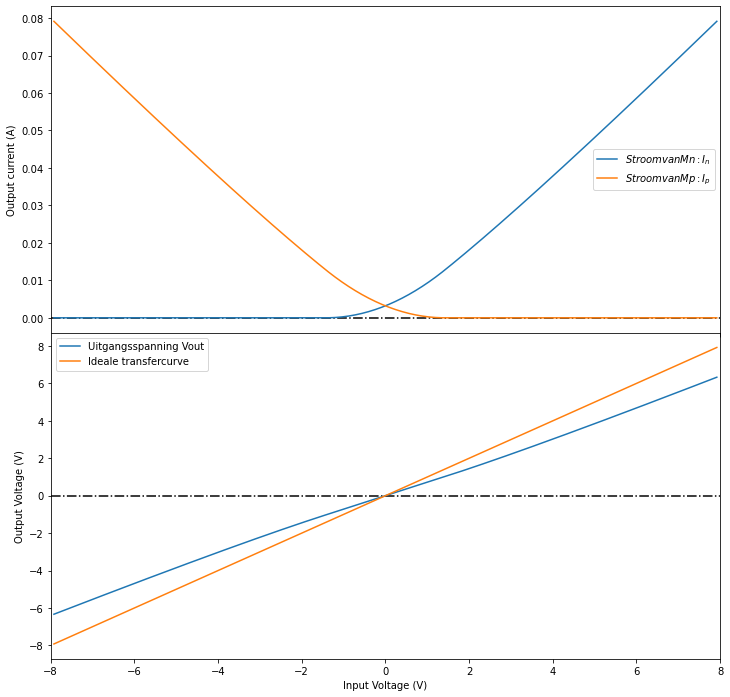

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Inmos(K,VGS,VT):
    if (VGS-VT)>0:
        return K*(VGS-VT)**2
    else:
        return 0
def Ipmos(K,VGS,VT):
    if (VGS-VT)<0:
        return K*(VGS-VT)**2
    else:
        return 0

def klasseBtransferplot(Vmax,Kp=0.02,Kn=0.02,Vd=0.7,vtp=-0.3,vtn=0.3,RL=80):
    vii=np.arange(0,Vmax,Vmax/100) # sweeping up
    Avout=[]
    Aiin=[]
    Aiip=[]
    voo=0
    for vi in vii:
        vgn=vi+Vd
        vgp=vi-Vd
        for ii in range(40):
            vgsn=vgn-voo
            vgsp=vgp-voo
            voo2=RL*(Inmos(Kn,vgsn,vtn)-Ipmos(Kp,vgsp,vtp))
            voo=(4*voo+voo2)/5
        Avout.append(voo)
        Aiin.append(Inmos(Kn,vgsn,vtn))
        Aiip.append(Ipmos(Kp,vgsp,vtp))
    vii=np.arange(0,-Vmax,-Vmax/100)  # sweeping down
    Bvout=[]
    Biin=[]
    Biip=[]
    voo=0
    for vi in vii:
        vgn=vi+Vd
        vgp=vi-Vd
        for ii in range(40):
            vgsn=vgn-voo
            vgsp=vgp-voo
            voo2=RL*(Inmos(Kn,vgsn,vtn)-Ipmos(Kp,vgsp,vtp))
            voo=(4*voo+voo2)/5
        Bvout.append(voo)
        Biin.append(Inmos(Kn,vgsn,vtn))
        Biip.append(Ipmos(Kp,vgsp,vtp))
        
    vii=np.arange(-Vmax+Vmax/100,Vmax,Vmax/100) # double sweep
    
    vout=Bvout[::-1]+Avout[1:]
    iin=Biin[::-1]+Aiin[1:]
    iip=Biip[::-1]+Aiip[1:]
    fig, ax = plt.subplots(2, figsize=(12,12), sharex=True)
    fig.subplots_adjust(hspace=0)
    ax[0].axhline(linestyle="-.",color='black')
    ax[1].axhline(linestyle="-.",color='black')
    ax[1].plot(vii,vout,label="Uitgangsspanning Vout")
    ax[1].plot(vii,vii,label="Ideale transfercurve")
    ax[0].plot(vii,iin,label="$Stroom van Mn: I_n$")
    ax[0].plot(vii,iip,label="$Stroom van Mp: I_p$")
    ax[1].set_xlabel("Input Voltage (V)")
    ax[0].set_ylabel("Output current (A)")  
    ax[1].set_ylabel("Output Voltage (V)")
    ax[1].set_xlim(-Vmax,Vmax)
    ax[0].legend()
    ax[1].legend()
    plt.show();

klasseBtransferplot(8)

```{figure} ./images/mpl.svg
---
name: transfer1
---
Transfer curve en stroom van de beide transistors.
```

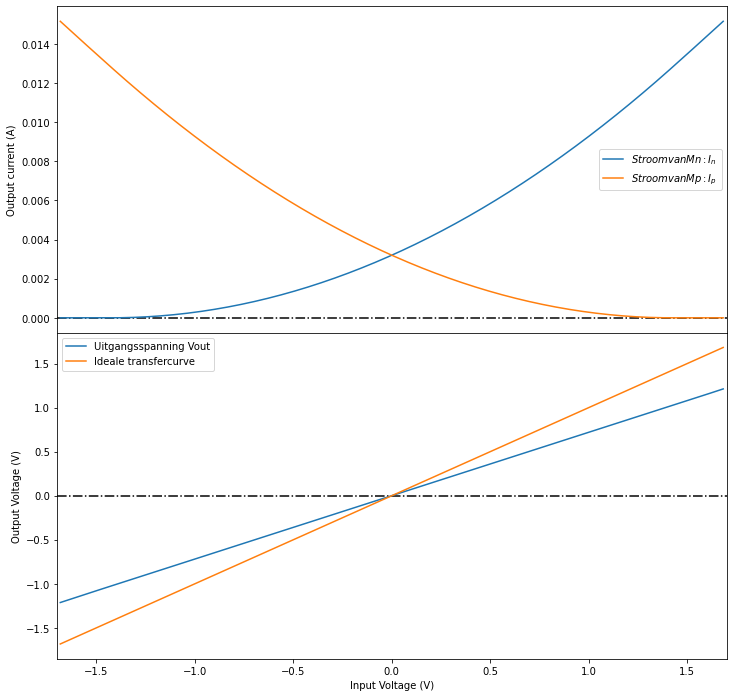

In [2]:
klasseBtransferplot(1.7,RL=80)

```{figure} ./images/mpl.svg
---
name: transfer1b
---
Detail van de zone rond de oorsprong. We zien dat hier beide transistors in geleiding zijn.
```

## Referenties

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|11916217/EY2R3695"></i>
    <div class="csl-left-margin">1.</div><div class="csl-right-inline">Xicheng Jiang, Fundamentals of Audio Class D Amplifier Design: A Review of Schemes and Architectures. <i>IEEE Solid-State Circuits Magazine</i>, <b>9</b> (2017) 14–25. <a href="https://doi.org/10.1109/MSSC.2017.2712368">https://doi.org/10.1109/MSSC.2017.2712368</a>.</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->